## Working with missing data

This notebook is based on the original documentation of Pandas

**NOTE** If you want to consider `inf` and `-inf` to be `NA`, you can set `pandas.options.mode.use_inf_as_na = True`

In [101]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None

In [6]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    index=['a', 'c', 'e', 'f', 'h'],
    columns=['one', 'two', 'three'])
df['four'] = 'bar'
df['five'] = df['one'] > 0

In [7]:
df

,one,two,three,four,five
a,1.115782,1.063565,-0.615685,bar,True
c,0.838391,1.780898,2.069920,bar,True
e,0.439418,-0.493618,-1.797320,bar,True
f,0.207695,-1.288473,0.219865,bar,True
h,-0.121949,1.278072,-1.848976,bar,False


In [8]:
df2 = df.reindex(["a", "b", "c", "d", "e", "f", "g", "h"])

In [9]:
df2

,one,two,three,four,five
a,1.115782,1.063565,-0.615685,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.838391,1.780898,2.069920,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,0.439418,-0.493618,-1.797320,bar,True
f,0.207695,-1.288473,0.219865,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-0.121949,1.278072,-1.848976,bar,False


## `isna` and `notna` functions

In [10]:
df2['one']

a    1.115782
b         NaN
c    0.838391
d         NaN
e    0.439418
f    0.207695
g         NaN
h   -0.121949
Name: one, dtype: float64

In [13]:
pd.isna(df2['one']), df2['one'].isna()

(a    False
 b     True
 c    False
 d     True
 e    False
 f    False
 g     True
 h    False
 Name: one, dtype: bool,
 a    False
 b     True
 c    False
 d     True
 e    False
 f    False
 g     True
 h    False
 Name: one, dtype: bool)

In [15]:
df2['one'].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

In [16]:
df2.isna()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [24]:
# Warning:
print(None == None)
print(np.nan == np.nan)

True
False


### Do not use equality comparison for checking missing values in pandas

In [25]:
df2["one"] == np.nan

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

## Datetime missing values

In [27]:
df2 = df.copy()

In [32]:
df2['timestamp'] = pd.date_range(start='2021-01-01', end='2021-01-05')

In [33]:
df2

,one,two,three,four,five,timestamp
a,1.115782,1.063565,-0.615685,bar,True,2021-01-01
c,0.838391,1.780898,2.069920,bar,True,2021-01-02
e,0.439418,-0.493618,-1.797320,bar,True,2021-01-03
f,0.207695,-1.288473,0.219865,bar,True,2021-01-04
h,-0.121949,1.278072,-1.848976,bar,False,2021-01-05


In [34]:
df2.loc[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan

In [35]:
df2

,one,two,three,four,five,timestamp
a,NaN,1.063565,-0.615685,bar,True,NaT
c,NaN,1.780898,2.069920,bar,True,NaT
e,0.439418,-0.493618,-1.797320,bar,True,2021-01-03
f,0.207695,-1.288473,0.219865,bar,True,2021-01-04
h,NaN,1.278072,-1.848976,bar,False,NaT


In [36]:
df2.dtypes.value_counts()

float64           3
bool              1
object            1
datetime64[ns]    1
dtype: int64

## Inserting missing data

For numeric values the data gets converted to `NaN`

In [38]:
s = pd.Series([1, 2, 3])
s.loc[0] = None
s

0    NaN
1    2.0
2    3.0
dtype: float64

For object containers the given value is used:

In [39]:
s = pd.Series(["a", "b", "c"])
s.loc[0] = None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

## Calculation with missing data

In [43]:
a = df.iloc[:, :2]
b = df.iloc[:, :3]

In [46]:
a

,one,two
a,1.115782,1.063565
c,0.838391,1.780898
e,0.439418,-0.493618
f,0.207695,-1.288473
h,-0.121949,1.278072


In [47]:
b

,one,two,three
a,1.115782,1.063565,-0.615685
c,0.838391,1.780898,2.069920
e,0.439418,-0.493618,-1.797320
f,0.207695,-1.288473,0.219865
h,-0.121949,1.278072,-1.848976


In [45]:
a + b

,one,three,two
a,2.231564,NaN,2.127129
c,1.676781,NaN,3.561797
e,0.878836,NaN,-0.987237
f,0.415390,NaN,-2.576946
h,-0.243898,NaN,2.556144


* When summing data, NA (missing) values will be treated as zero.
* If the data are all NA, the result will be 0.
* Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

In [57]:
b.iloc[[0,1,4], 0] = np.nan

In [58]:
b

,one,two,three
a,NaN,1.063565,-0.615685
c,NaN,1.780898,2.069920
e,0.439418,-0.493618,-1.797320
f,0.207695,-1.288473,0.219865
h,NaN,1.278072,-1.848976


In [59]:
b['one'].sum()

0.6471129350704785

In [52]:
b.mean(axis=1)

a    0.521221
c    1.563070
e   -0.617173
f   -0.286971
h   -0.230951
dtype: float64

In [60]:
b.cumsum()

,one,two,three
a,NaN,1.063565,-0.615685
c,NaN,2.844463,1.454236
e,0.439418,2.350845,-0.343084
f,0.647113,1.062372,-0.123219
h,NaN,2.340444,-1.972195


In [61]:
b.cumsum(skipna=False)

,one,two,three
a,NaN,1.063565,-0.615685
c,NaN,2.844463,1.454236
e,NaN,2.350845,-0.343084
f,NaN,1.062372,-0.123219
h,NaN,2.340444,-1.972195


## Filling missing values: fillna

In [62]:
df2

,one,two,three,four,five,timestamp
a,NaN,1.063565,-0.615685,bar,True,NaT
c,NaN,1.780898,2.069920,bar,True,NaT
e,0.439418,-0.493618,-1.797320,bar,True,2021-01-03
f,0.207695,-1.288473,0.219865,bar,True,2021-01-04
h,NaN,1.278072,-1.848976,bar,False,NaT


In [64]:
df2.fillna(0)

,one,two,three,four,five,timestamp
a,0.000000,1.063565,-0.615685,bar,True,0
c,0.000000,1.780898,2.069920,bar,True,0
e,0.439418,-0.493618,-1.797320,bar,True,2021-01-03 00:00:00
f,0.207695,-1.288473,0.219865,bar,True,2021-01-04 00:00:00
h,0.000000,1.278072,-1.848976,bar,False,0


In [66]:
df2['one'].fillna('missing')

a     missing
c     missing
e    0.439418
f    0.207695
h     missing
Name: one, dtype: object

### Fill gaps forward or backward

In [68]:
df2.fillna(method='ffill')

,one,two,three,four,five,timestamp
a,NaN,1.063565,-0.615685,bar,True,NaT
c,NaN,1.780898,2.069920,bar,True,NaT
e,0.439418,-0.493618,-1.797320,bar,True,2021-01-03
f,0.207695,-1.288473,0.219865,bar,True,2021-01-04
h,0.207695,1.278072,-1.848976,bar,False,2021-01-04


In [69]:
df2.fillna(method='bfill')

,one,two,three,four,five,timestamp
a,0.439418,1.063565,-0.615685,bar,True,2021-01-03
c,0.439418,1.780898,2.069920,bar,True,2021-01-03
e,0.439418,-0.493618,-1.797320,bar,True,2021-01-03
f,0.207695,-1.288473,0.219865,bar,True,2021-01-04
h,NaN,1.278072,-1.848976,bar,False,NaT


In [71]:
df2['one'].fillna(method='bfill').fillna(0)

a    0.439418
c    0.439418
e    0.439418
f    0.207695
h    0.000000
Name: one, dtype: float64

## Dropping axis labels with missing data: dropna

In [73]:
df2

,one,two,three,four,five,timestamp
a,NaN,1.063565,-0.615685,bar,True,NaT
c,NaN,1.780898,2.069920,bar,True,NaT
e,0.439418,-0.493618,-1.797320,bar,True,2021-01-03
f,0.207695,-1.288473,0.219865,bar,True,2021-01-04
h,NaN,1.278072,-1.848976,bar,False,NaT


In [74]:
df2.dropna()

,one,two,three,four,five,timestamp
e,0.439418,-0.493618,-1.797320,bar,True,2021-01-03
f,0.207695,-1.288473,0.219865,bar,True,2021-01-04


In [75]:
df2.dropna(axis=1)

,two,three,four,five
a,1.063565,-0.615685,bar,True
c,1.780898,2.069920,bar,True
e,-0.493618,-1.797320,bar,True
f,-1.288473,0.219865,bar,True
h,1.278072,-1.848976,bar,False


In [79]:
df2['one'].dropna()

e    0.439418
f    0.207695
Name: one, dtype: float64

In [78]:
df2['one'].fillna(method='bfill').dropna()

a    0.439418
c    0.439418
e    0.439418
f    0.207695
Name: one, dtype: float64

## Interpolation
Default method of interpolation is linear but different methods can be used (scipy required)

In [138]:
ser = pd.Series(np.cumsum(np.random.randn(100)), index=pd.date_range(datetime.today()-timedelta(100), periods=100))
ser[pd.Series(np.random.randint(1,100, 70)).unique()] = np.nan

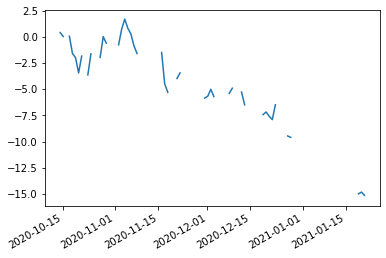

In [139]:
ser.plot();

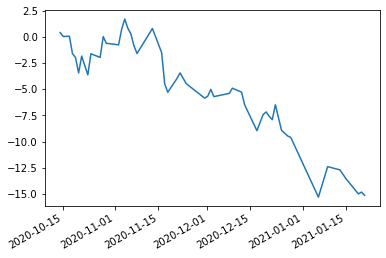

In [140]:
ser.interpolate().plot();

In [141]:
ser.interpolate(method='time') # index aware interpolation

2020-10-14 02:36:04.915662     0.446140
2020-10-15 02:36:04.915662     0.067232
2020-10-16 02:36:04.915662     0.080426
2020-10-17 02:36:04.915662     0.093619
2020-10-18 02:36:04.915662    -1.567495
                                ...    
2021-01-17 02:36:04.915662   -14.301384
2021-01-18 02:36:04.915662   -14.660889
2021-01-19 02:36:04.915662   -15.020395
2021-01-20 02:36:04.915662   -14.851626
2021-01-21 02:36:04.915662   -15.162176
Freq: D, Length: 100, dtype: float64

### Various methods of interpolation

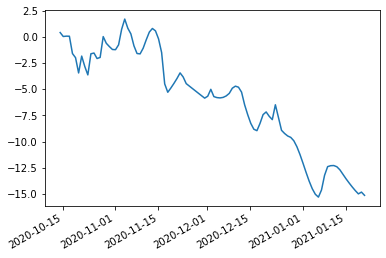

In [142]:
ser.interpolate(method='akima').plot();

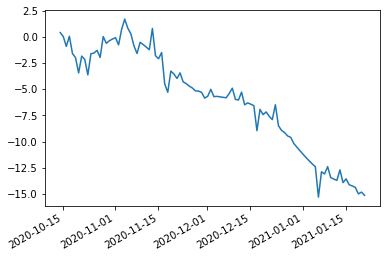

In [170]:
ser.interpolate(method='spline', order=5).plot();

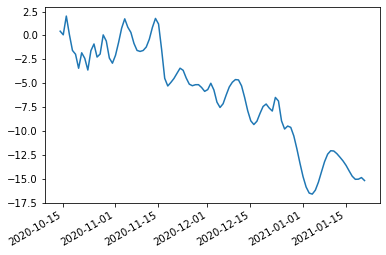

In [172]:
ser.interpolate(method='polynomial', order=5).plot();

## Replace

In [173]:
ser = pd.Series([0.0, 1.0, 2.0, 3.0, 4.0])

In [174]:
ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

### Next: kaggle exercises https://www.kaggle.com/residentmario/data-types-and-missing-values, https://www.kaggle.com/learn/data-cleaning